# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df.head()


# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
Mice_count = mouse_data_complete_df ['Mouse ID'].nunique()
Mice_count

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete_df[mouse_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = mouse_data_complete_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

clean_df = mouse_data_complete_df.drop_duplicates(subset='Mouse ID', keep='first')
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [34]:
# Checking the number of mice in the clean DataFrame.
New_Mice_count = clean_df ['Mouse ID'].nunique()
New_Mice_count

249

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = mouse_data_complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats = pd.DataFrame({
    'Mean': grouped_df.mean(),
    'Median': grouped_df.median(),
    'Variance': grouped_df.var(),
    'Standard Deviation': grouped_df.std(),
    'SEM': grouped_df.apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))  # Standard Error of the Mean
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

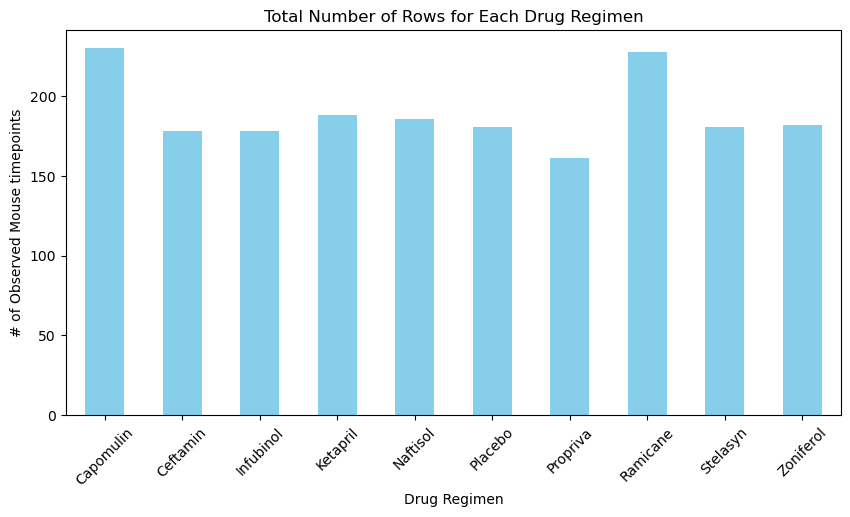

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = mouse_data_complete_df.groupby('Drug Regimen').size()

# Create a bar plot
drug_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse timepoints')

# Show the plot
plt.xticks(rotation=45)  
plt.show()

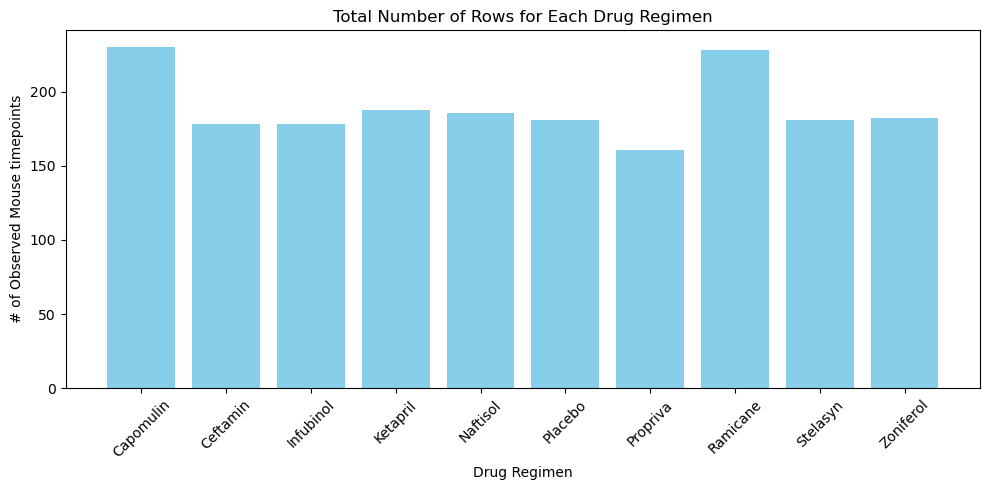

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = mouse_data_complete_df.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values, color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout() 
plt.show()

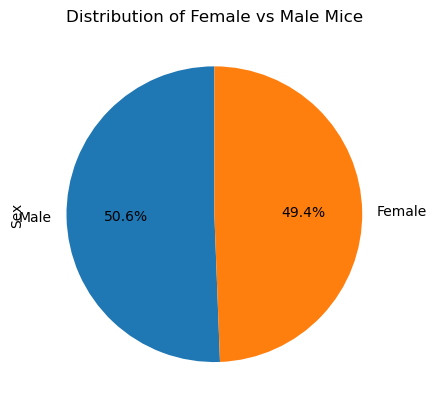

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of occurrences of each sex
sex_counts = mouse_data_complete_df['Sex'].value_counts()

# Create a pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Display the pie chart
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')  
plt.show()

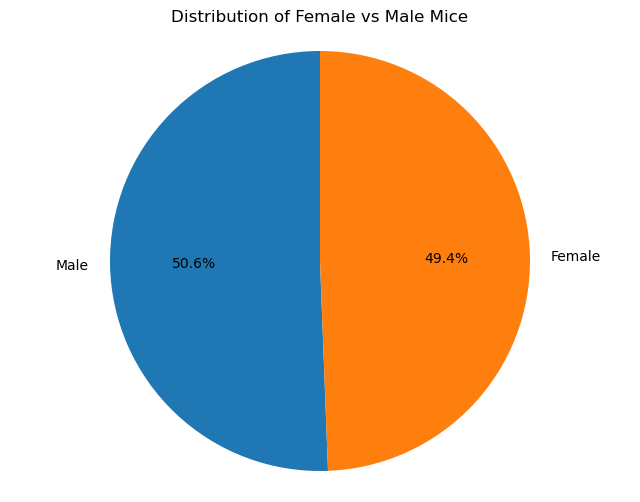

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of occurrences of each sex
sex_counts = mouse_data_complete_df['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = mouse_data_complete_df.groupby('Mouse ID').last().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, mouse_data_complete_df, on=['Mouse ID', 'Timepoint'])
merged_df
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes_df = merged_df[merged_df['Drug Regimen_x'].isin(treatment_regimens)]
final_tumor_volumes_df



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1,Ramicane,Male,3,22,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin,Female,6,27,68.594745,4
240,y793,Capomulin,Male,17,17,45,31.896238,2,Capomulin,Male,17,17,31.896238,2
241,y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin,Male,23,26,64.729837,3
245,z578,Ramicane,Male,11,16,45,30.638696,0,Ramicane,Male,11,16,30.638696,0


In [41]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []





# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = merged_df['Tumor Volume (mm3)_x'].quantile(0.25)
Q3 = merged_df['Tumor Volume (mm3)_x'].quantile(0.75)


# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
    

# Identify potential outliers
potential_outliers = merged_df[(merged_df['Tumor Volume (mm3)_x'] < lower_bound) | (merged_df['Tumor Volume (mm3)_x'] > upper_bound)]

    
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(potential_outliers)
    


Lower Bound: 17.400437649999986
Upper Bound: 93.49183637000002
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen_x, Sex_x, Age_months_x, Weight (g)_x, Timepoint, Tumor Volume (mm3)_x, Metastatic Sites_x, Drug Regimen_y, Sex_y, Age_months_y, Weight (g)_y, Tumor Volume (mm3)_y, Metastatic Sites_y]
Index: []


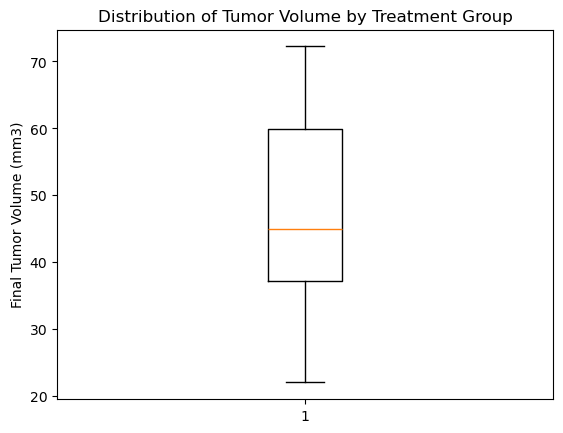

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a box plot



Tumors = final_tumor_volumes_df['Tumor Volume (mm3)_x']

fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume by Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(Tumors)
plt.show()




## Line and Scatter Plots

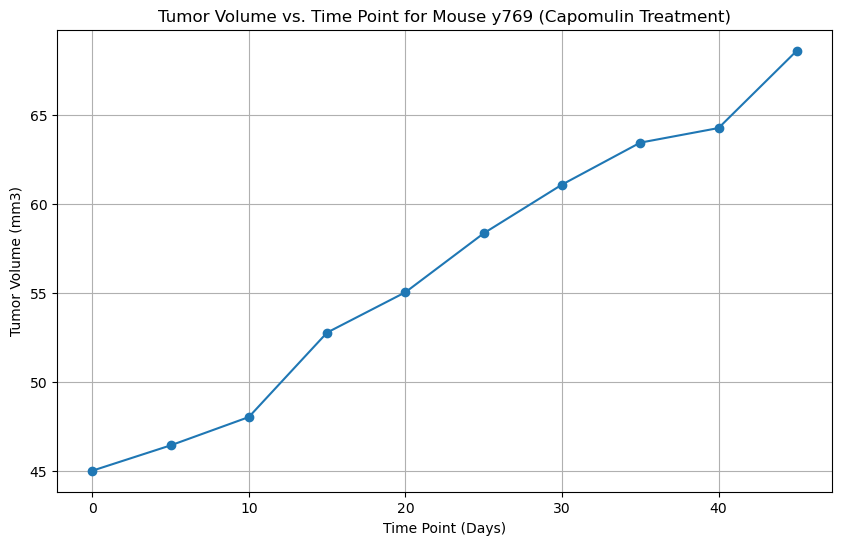

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'y769'
mouse_data = mouse_data_complete_df[mouse_data_complete_df['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

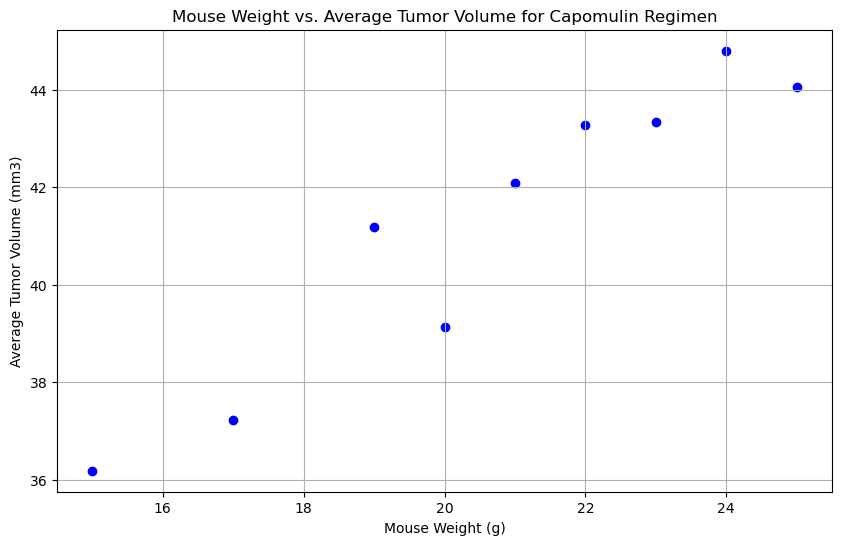

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = mouse_data_complete_df[mouse_data_complete_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

Correlation coefficient: 0.9505243961855268
Slope: 0.894772609734063, Intercept: 22.764229983591896


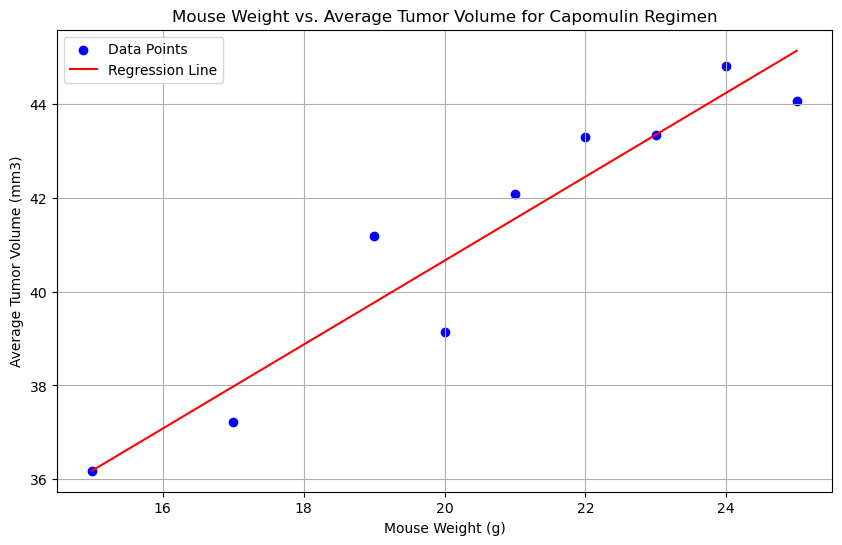

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = mouse_data_complete_df[mouse_data_complete_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Slope: {slope}, Intercept: {intercept}")

regression_line = slope * avg_tumor_volume['Weight (g)'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(avg_tumor_volume['Weight (g)'], regression_line, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()
plt.show()
